In [2]:
library("dplyr")
library("ggplot2")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [1]:
# This is a test comment

In [4]:
ytdata <- read.csv(file="USvideos.csv", header=TRUE, sep=",")

In [3]:
names(ytdata)

[1] "video_id"               "trending_date"          "title"                 
 [4] "channel_title"          "category_id"            "publish_time"          
 [7] "tags"                   "views"                  "likes"                 
[10] "dislikes"               "comment_count"          "thumbnail_link"        
[13] "comments_disabled"      "ratings_disabled"       "video_error_or_removed"
[16] "description"

In [4]:
head(ytdata)

video_id    trending_date
1 2kyS6SvSYSE 17.14.11     
2 1ZAPwfrtAFY 17.14.11     
3 5qpjK5DgCt4 17.14.11     
4 puqaWrEC7tY 17.14.11     
5 d380meD0W0M 17.14.11     
6 gHZ1Qz0KiKM 17.14.11     
  title                                                         
1 WE WANT TO TALK ABOUT OUR MARRIAGE                            
2 The Trump Presidency: Last Week Tonight with John Oliver (HBO)
3 Racist Superman | Rudy Mancuso, King Bach & Lele Pons         
4 Nickelback Lyrics: Real or Fake?                              
5 I Dare You: GOING BALD!?                                      
6 2 Weeks with iPhone X                                         
  channel_title         category_id publish_time            
1 CaseyNeistat          22          2017-11-13T17:13:01.000Z
2 LastWeekTonight       24          2017-11-13T07:30:00.000Z
3 Rudy Mancuso          23          2017-11-12T19:05:24.000Z
4 Good Mythical Morning 24          2017-11-13T11:00:04.000Z
5 nigahiga              24          2017-11-12T18:01:41.000Z
6 iJustine              28          2017-11-13T19:07:23.000Z
  tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1 SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2 last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"                                                                                                                                                                                                                                                                                                                                                                                       
3 racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"                                                                                                                                                                   
4 rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"
5 ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail"                                                                                                                                                                                                                                                                                                                                                                     
6 ijustine|"week with iPhone X"|"iphone x"|"

In [5]:
head(ytdata$tags)

[1] SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
[2] last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"                                                                                                                                                                                                                                                                                                                                                                                       
[3] racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"                                                                                                                                                                   
[4] rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"
[5] ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail"                                                                                                                                                                                                                                                                                                                                                                     
[6] ijustine|"week with iPhone X"|"iphone x"|"apple"|"iphone"|"iphone x review"|"iphone x unboxing"                                                                                                                                                                                                                                                                                                                                                                                              
6055 Levels: #guitar #musiciseverywhere #jammin #meme #funny #deeppurple #pinkfloyd ...

In [5]:
tagsdata <- ytdata[c("views","tags")]

In [6]:
tagsdata$cleaned_tags <- NA
tagsdata$tags_count <- NA

In [42]:
head(tagsdata)

views  
1  748374
2 2418783
3 3191434
4  343168
5 2095731
6  119180
  tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
1 SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2 last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"                                                                                                                                                                                                                                                                                                                                                                                       
3 racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"                                                                                                                                                                   
4 rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"
5 ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail"                                                                                                                                                                                                                                                                                                                                                                     
6 ijustine|"week with iPhone X"|"iphone x"|"apple"|"iphone"|"iphone x review"|"iphone x unboxing"                                                                                                                                                                                                                                                                                                                                                                                              
  cleaned_tags tags_count
1 NA           NA        
2 NA           NA        
3 NA           NA        
4 NA           NA        
5 NA           NA        
6 NA           NA

In [6]:
test <- tagsdata[[2,"tags"]]

In [7]:
unlist(strsplit(as.character(test), "|", fixed = TRUE))

[1] "last week tonight trump presidency" "last week tonight donald trump"    
[3] "john oliver trump"                  "donald trump"

In [8]:
length(unlist(strsplit(as.character(test), "|", fixed = TRUE)))

[1] 4

In [7]:
#run this code to clean data
for(i in 1:length(tagsdata[,"tags"])){
    #converts tags into a character vector and returns the count
    tagsdata[i,"tags_count"] <- length(c(unlist(strsplit(as.character(tagsdata[i,"tags"]), "|", fixed = TRUE))))
    #cannot store a vector in a dataframe??? so have to keep as list
    tagsdata[i,"cleaned_tags"] <- list(strsplit(as.character(tagsdata[i,"tags"]), "|", fixed = TRUE))
}
head(tagsdata)

views  
1  748374
2 2418783
3 3191434
4  343168
5 2095731
6  119180
  tags                                                                                                                                                                                                                                                                                                                                                                                                                                     
1 SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                          
2 last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump                                                                                                                                                                                                                                                                                                                                         
3 racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons                                                                                                                                                         
4 rhett and link|gmm|good mythical morning|rhett and link good mythical morning|good mythical morning rhett and link|mythical morning|Season 12|nickelback lyrics|nickelback lyrics real or fake|nickelback|nickelback songs|nickelback song|rhett link nickelback|gmm nickelback|lyrics (website category)|nickelback (musical group)|rock|music|lyrics|chad kroeger|canada|music (industry)|mythical|gmm challenge|comedy|funny|challenge
5 ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|dares|no truth|comments|comedy|funny|stupid|fail                                                                                                                                                                                                                                                                                                                                           
6 ijustine|week with iPhone X|iphone x|apple|iphone|iphone x review|iphone x unboxing                                                                                                                                                                                                                                                                                                                                                      
  cleaned_tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [10]:
tagsdata[1:10,] #print out first 10 columns to verify

views  
1   748374
2  2418783
3  3191434
4   343168
5  2095731
6   119180
7  2103417
8   817732
9   826059
10  256426
   tags                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1  SHANtell martin                                                                                                                                                                                                                                                                                                                                                                                                                                         
2  last week tonight trump presidency|last week tonight donald trump|john oliver trump|donald trump                                                                                                                                                                                                                                                                                                                                                        
3  racist superman|rudy|mancuso|king|bach|racist|superman|love|rudy mancuso poo bear black white official music video|iphone x by pineapple|lelepons|hannahstocking|rudymancuso|inanna|anwar|sarkis|shots|shotsstudios|alesso|anitta|brazil|Getting My Driver's License | Lele Pons                                                                                                                                                                        
4  rhett and link|gmm|good mythical morning|rhett and link good mythical morning|good mythical morning rhett and link|mythical morning|Season 12|nickelback lyrics|nickelback lyrics real or fake|nickelback|nickelback songs|nickelback song|rhett link nickelback|gmm nickelback|lyrics (website category)|nickelback (musical group)|rock|music|lyrics|chad kroeger|canada|music (industry)|mythical|gmm challenge|comedy|funny|challenge               
5  ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|dares|no truth|comments|comedy|funny|stupid|fail                                                                                                                                                                                                                                                                                                                                                          
6  ijustine|week with iPhone X|iphone x|apple|iphone|iphone x review|iphone x unboxing                                                                                                                                                                                                                                                                                                                                                                     
7  SNL|Saturday Night Live|SNL Season 43|Episode 1730|Tiffany Haddish|Roy Moore|Mikey Day|Mike Pence|Beck Bennett|Jeff Sessions|Kate McKinnon|s43|s43e5|episode 5|live|new york|comedy|sketch|funny|hilarious|late night|host|music|guest|laugh|impersonation|actor|improv|musician|comedian|actress|If Loving You Is Wrong|Oprah Winfrey|OWN|Girls Trip|The Carmichael Show|Keanu|Taylor Swift|Reputation|Look What You Made Me Do|ready for it?|cold open
8  5 Ice Cream Gadgets|Ice Cream|Cream Sandwich Maker|gadgets|gadget review|review|unboxing|kitchen gadgets|Gadgets put to the Test|testing|10 Kitchen Gadgets|7 Camping Coffee Gadgets|10 Kitchen Gadgets put to the Test                                                                                                                

In [11]:
#change tags_count column to numeric from logical data type
tagsdata$tags_count <- as.numeric(tagsdata$tags_count)

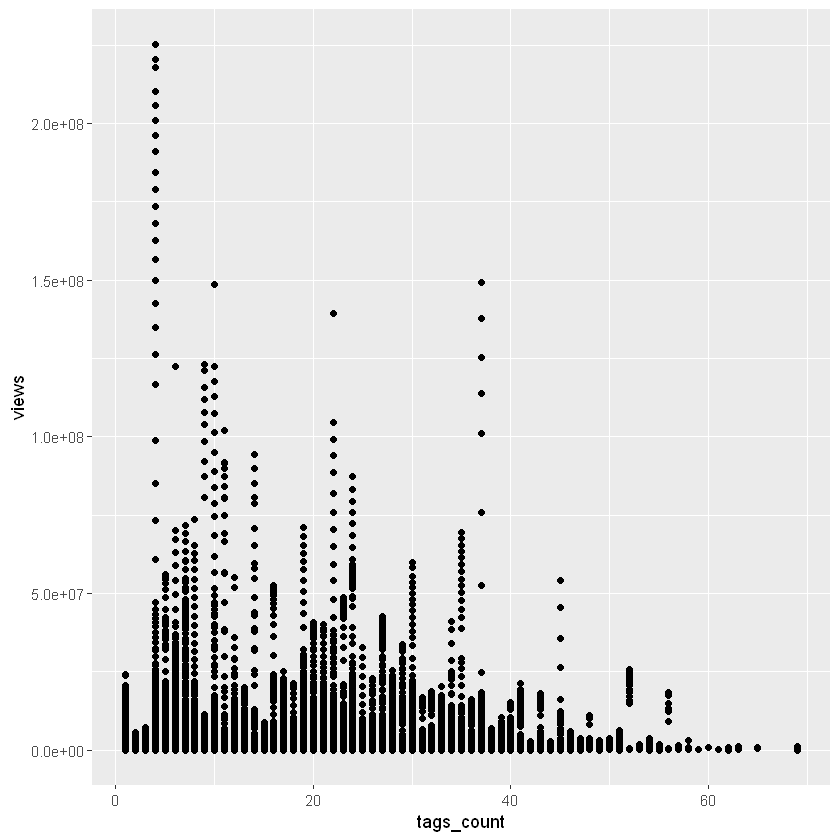

In [45]:
# tags_count v. views scatter plot graph
ggplot(tagsdata, aes(x=tags_count, y=views)) + geom_point()

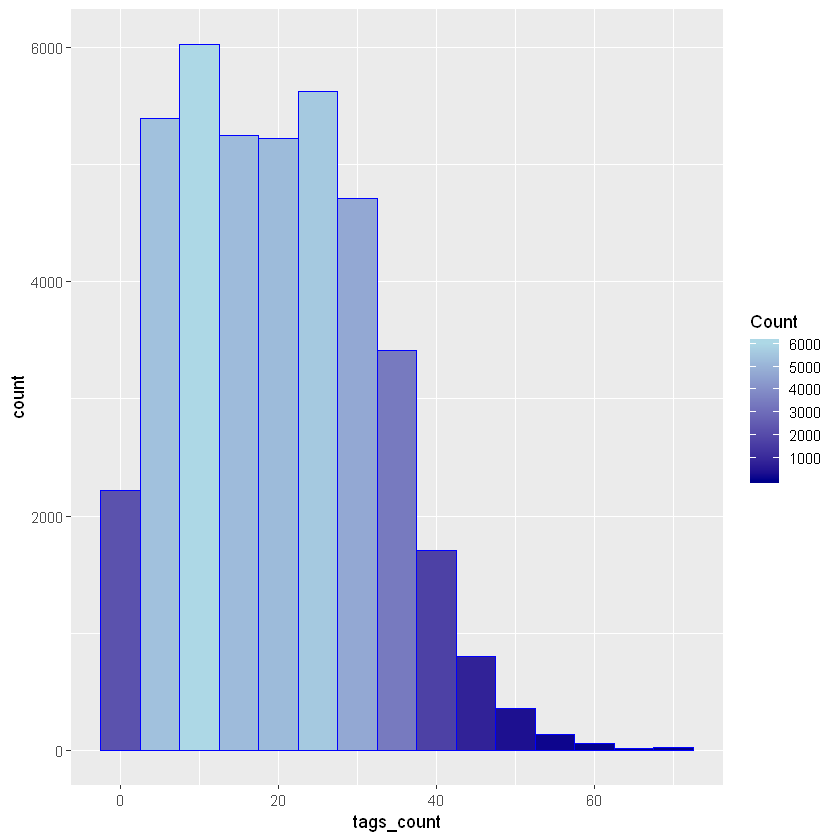

In [52]:
ggplot(tagsdata, aes(x=tags_count)) + geom_histogram(binwidth = 5, col="blue", aes(fill=..count..)) + scale_fill_gradient("Count", low="dark blue", high="light blue")
#geom_histogram(breaks=seq(20, 50, by=2), col="red", aes(fill=..count..))

In [48]:
median(tagsdata$tags_count)
mean(tagsdata$tags_count)

[1] 19

[1] 19.73633

In [45]:
# shows how many videos have a certain number of tags
# odd rows are number of tags, even rows are frequency 
table(tagsdata$tags_count)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1912  307  559 1405  950 1095 1388 1091 1175 1447 1198 1118 1299  919 1150  894 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
 988  945 1163 1052  977 1090  982 1255 1214 1053 1123  880  885 1260  792  892 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
 873  743  672  606  517  483  377  380  262  203  261  125  179  118  115   54 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   65 
 118   57  105   19   16   35   25   35   21   22    5    1    9   18   16    2 
  69 
  19 

In [50]:
# mode of tags_count
Mode <- function(x) {
names(table(tagsdata$tags_count))[table(tagsdata$tags_count)==max(table(tagsdata$tags_count))] 

[1] "1"

In [42]:
# function to calculate mode
Mode <- function(x) {
  uni <- unique(x)
  uni[which.max(tabulate(match(x, uni)))]
}
# mode of tags_count
Mode(tagsdata$tags_count)

[1] 1

In [40]:
# function to calculate mode
Mode <- function(x) {
  uni <- unique(x)
  uni[tabulate(x, uni)]
}
# mode of tags_count
Mode(tagsdata$tags_count)

Warning message in if (nbins > .Machine$integer.max) stop("attempt to make a table with >= 2^31 elements"):
“the condition has length > 1 and only the first element will be used”Warning message in if (is.na(nbins)) stop(gettextf("invalid value of %s", "'nbins'"), :
“the condition has length > 1 and only the first element will be used”

[1] NA

## Summary Stats:
1. There isn't a linear relationship between # of views a video has and # of tags it has.
1. Min tags_count is 1, max tags_count is 69.
1. The mode of tags_count is 1 (aka most videos only have one tag).
1. The average tags_count is about 19.